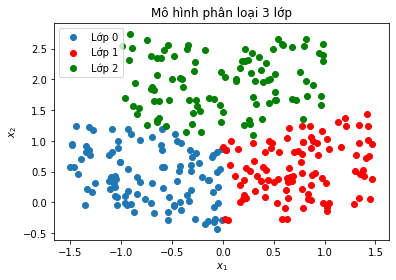

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# data size (each)
N = 100

# generate original data
X_1_data_1 = np.random.uniform(-1.5,0,N)
X_1_data_2 = -X_1_data_1/3 + 1 - np.random.uniform(0,1.5,N)
X_2_data_1 = np.random.uniform(0,1.5,N)
X_2_data_2 = X_2_data_1/3 + 1 - np.random.uniform(0,1.5,N)
X_3_data_1_ = np.random.uniform(-1,0,N//2)
X_3_data_1__ = np.random.uniform(0,1,N//2)
X_3_data_1 = np.hstack((X_3_data_1_, X_3_data_1__))
X_3_data_2_ = -X_3_data_1_/3 + 1 + np.random.uniform(0,1.5,N//2)
X_3_data_2__ = X_3_data_1__/3 + 1 + np.random.uniform(0,1.5,N//2)
X_3_data_2 = np.hstack((X_3_data_2_, X_3_data_2__))

# setting the plot
fig, ax = plt.subplots()
ax.set_title('Mô hình phân loại 3 lớp')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')

# plot the original data
ax.scatter(X_1_data_1, X_1_data_2, label='Lớp 0')
ax.scatter(X_2_data_1, X_2_data_2, label='Lớp 1', c='r')
ax.scatter(X_3_data_1, X_3_data_2, label='Lớp 2', c='g')
ax.legend()
plt.show()

In [13]:
# numbers of feature
M = 11

# numbers of class
K = 3

# initialize w
w = np.array([[1 for i in range(M)] for j in range(K)])

# learning rate
lr = 0.5

# epoch
epoch = 1

In [14]:
# get transformed data
def getTransformedData(X, t, N, M, K):
    X_data = np.empty((0,M))
    t_data = np.array([])
    Y_data = np.empty((0,K))
    for i in range(K):
        X_data = np.vstack((X_data, transformClassData(X[i], t[i], N, M)))
        t_data = np.hstack((t_data, [i for j in range(N)]))
        Y_data = np.vstack((Y_data, [np.identity(K)[i] for j in range(N)]))
    return X_data, t_data, Y_data

# transform data of one class
def transformClassData(X, t, N, M):
    res = np.empty((0,M))
    for i in range(N):
        res = np.vstack((res, getTransformedFeature(X[i], t[i], M)))
    return res

# transform each row of data
def getTransformedFeature(x, t, M):
    res = np.array([])
    count = 0
    exp_1 = 0
    exp_2 = 0
    while(True):
        res = np.append(res, (x**exp_1)*(t**exp_2))
        count += 1
        if (count == M):
            break
        else:
            exp_1 -= 1
            if (exp_1 == -1):
                exp_1 = exp_2 + 1
                exp_2 = 0
            else:
                exp_2 += 1
    return res

# calculate softmax function
def softmax(z, K):
    return np.array([(z[k]/np.sum(z)) for k in range(K)])

# gradient descent
def gradientDescent(X, Y, w, N, M, K):
    new_X = np.copy(X)
    new_Y = np.copy(Y)
    idx = np.arange(N*K)
    for i in range(epoch):
        np.random.shuffle(idx)
        new_X = new_X[idx]
        new_Y = new_Y[idx]
        for j in range(N*K):
            z = np.dot(new_X[j], w.T)
            y_ = softmax(z, K)
            gradient = np.dot((y_ - new_Y[j]).reshape(K,1),new_X[j].reshape(1,M))
            w = w - lr*gradient
    return w

# predict function
def predict(X, Y, w, M, K):
    res = np.empty((0,len(X[0])))
    for x,y in zip(X,Y):
        N = len(x)
        X_ = transformClassData(x, y, N, M)
        Z = np.dot(X_, w.T)
        Y_ = np.empty((0,1))
        for z in Z:
            y_ = softmax(z, K)
            Y_ = np.vstack((Y_, np.where(y_ == np.amax(y_))))
        res = np.vstack((res, Y_.reshape(1,N)))
    return res

In [15]:
# transformed data
X_ = np.vstack((X_1_data_1,X_2_data_1,X_3_data_1))
t_ = np.vstack((X_1_data_2,X_2_data_2,X_3_data_2))
(X_data, t_data, Y_data) = getTransformedData(X_, t_, N, M, K)

# gradient descent
last_w = gradientDescent(X_data, Y_data, w, N, M, K)
print(last_w)

[[ 1.99233553 -1.76224252  1.68102647 -0.87084155 -1.53395509  0.41781686
  -0.73958165  1.31453998  0.24210965 -0.37058589  0.64345887]
 [ 1.7569894   4.84721534  2.30073579  4.23529498  4.0079355   0.07933201
   4.61811171  2.56306825 -1.7554927  -1.50361313  2.5624363 ]
 [-0.74932494 -0.08497281 -0.98176226 -0.36445343  0.52601958  2.50285113
  -0.87853005 -0.87760822  4.51338305  4.87419903 -0.20589518]]


In [16]:
# plotting data
x = np.arange(-1.7, 1.7, 0.01)
y = np.arange(-0.6, 3, 0.01)
(xx, yy) = np.meshgrid(x, y)
z = predict(xx,yy,last_w,M,K)
print(z)

[[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]]


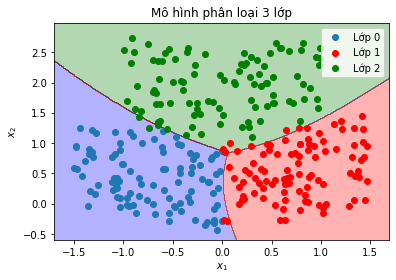

In [17]:
# setting the plot
fig, ax = plt.subplots()
ax.set_title('Mô hình phân loại 3 lớp')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')

# plot the original data
ax.contourf(x,y,z,colors=['b','g','r','r','r','r'],alpha=0.3)
ax.scatter(X_1_data_1, X_1_data_2, label='Lớp 0')
ax.scatter(X_2_data_1, X_2_data_2, label='Lớp 1', c='r')
ax.scatter(X_3_data_1, X_3_data_2, label='Lớp 2', c='g')
ax.legend()
plt.show()